In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
import time
import warnings
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

# 简单分类器实现
from sklearn.linear_model import LogisticRegression # 逻辑回归
from sklearn.linear_model import SGDClassifier      # 随机梯度
from sklearn.neighbors import KNeighborsClassifier  # K近邻
from sklearn.svm import SVC                         # 支撑向量机
from sklearn.tree import DecisionTreeClassifier     # 决策树
from sklearn.ensemble import RandomForestClassifier # 随机森林
from sklearn.model_selection import cross_val_score # 交叉验证计算accuracy
from sklearn.model_selection import GridSearchCV    # 网格搜索，获取最优参数
from sklearn.model_selection import StratifiedKFold # 交叉验证
from collections import Counter
# 评估指标
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier # 集成学习
from xgboost import XGBClassifier                   # 极限梯度提升树
from lightgbm import LGBMClassifier
import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from xgboost import plot_importance

In [6]:
# 加载数据文件
df = pd.read_csv("12345.csv")
df

,个人编码,就诊次数_SUM,月就诊天数_MAX,月就诊次数_MAX,月统筹金额_MAX,月药品金额_MAX,医院_就诊天数_MAX,医院_统筹金_AVG,医院_药品_AVG,顺序号_NN,...,一次性医用材料申报金额_SUM,起付标准以上自负比例金额_SUM,基本统筹基金支付金额_SUM,非账户支付金额_SUM,本次审批金额_SUM,医疗救助医院申请_SUM,出院诊断LENTH_MAX,个人支付的药品占比,治疗费用在总金额占比,RES
0,3.520000e+14,-0.119144,-0.196618,-0.272979,-0.150540,0.100665,-0.377474,-0.477712,-0.412614,-0.345658,...,-0.535131,-0.275780,-0.021326,-0.186219,-0.098738,-0.08861,0.242960,-0.088489,-0.474672,0
1,3.520000e+14,-0.922329,-0.912078,-0.850000,-0.587688,-0.440668,-0.775503,-0.498210,-0.418533,-0.422609,...,-0.552414,-0.543207,-0.622834,-0.422248,-0.558526,-0.08861,-0.493848,-0.180041,-0.436354,0
2,3.520000e+14,0.345859,0.041869,0.111702,-0.198437,-0.122750,-0.206890,-0.467672,-0.506666,0.162216,...,0.076416,0.011503,0.006462,0.087439,-0.030225,-0.08861,0.242960,-0.369430,0.730951,0
3,3.520000e+14,-0.584146,-0.435104,-0.465319,-0.310809,-0.794399,-0.548058,-0.346610,-0.735615,-0.545730,...,-0.556208,-0.418830,-0.343112,-0.369401,-0.344706,-0.08861,-0.821318,-0.379994,2.955612,0
4,3.520000e+14,-0.457327,-0.673591,-0.657659,-0.548592,-0.398128,-0.036306,0.495455,0.899449,-0.422609,...,-0.556208,-0.377856,-0.250886,-0.284146,-0.274215,-0.08861,0.570430,-0.370556,-0.417877,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,3.520000e+14,0.134494,0.041869,-0.080639,-0.378749,-0.189969,-0.434335,-0.574312,-0.509975,-0.176367,...,-0.556208,-0.394664,-0.288684,-0.288087,-0.303107,-0.08861,0.161092,-0.355566,-0.436818,0
15996,3.520000e+14,0.219040,0.041869,0.111702,-0.536133,-0.558259,0.077417,-0.342101,-0.383960,-0.099416,...,0.055866,-0.229149,-0.581557,-0.656692,-0.476129,-0.08861,-0.084510,-0.388247,-0.268312,0
15997,3.520000e+14,0.219040,0.041869,0.111702,0.503512,0.471829,-0.150029,0.345088,0.307560,-0.037856,...,-0.556208,0.148523,0.933166,0.263885,0.630857,-0.08861,0.324828,0.088543,0.915992,0
15998,3.520000e+14,-0.710965,-0.673591,-0.657659,0.452145,0.990675,-0.377474,1.588036,2.558751,-0.376438,...,-0.541032,0.081719,0.757094,0.947911,0.498242,-0.08861,-1.721861,-0.393117,-0.481151,0


In [7]:
df.columns#标签读取

Index(['个人编码', '就诊次数_SUM', '月就诊天数_MAX', '月就诊次数_MAX', '月统筹金额_MAX', '月药品金额_MAX',
       '医院_就诊天数_MAX', '医院_统筹金_AVG', '医院_药品_AVG', '顺序号_NN', '交易时间DD_NN',
       '个人账户金额_SUM', '统筹支付金额_SUM', 'ALL_SUM', '药品费自费金额_SUM', '药品费申报金额_SUM',
       '中成药费发生金额_SUM', '中草药费发生金额_SUM', '检查费发生金额_SUM', '检查费申报金额_SUM',
       '治疗费发生金额_SUM', '医用材料费自费金额_SUM', '一次性医用材料申报金额_SUM', '起付标准以上自负比例金额_SUM',
       '基本统筹基金支付金额_SUM', '非账户支付金额_SUM', '本次审批金额_SUM', '医疗救助医院申请_SUM',
       '出院诊断LENTH_MAX', '个人支付的药品占比', '治疗费用在总金额占比', 'RES'],
      dtype='object')

In [8]:
X = df.drop('RES', axis=1) # 数据集
y = df['RES'] # 标签
y.value_counts()

RES
0    15207
1      793
Name: count, dtype: int64

In [9]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# over
over = SMOTE(sampling_strategy=0.1)

# under
under = RandomUnderSampler(sampling_strategy=0.5)

# pipeline
steps = [('o', over),('u', under)]

pipeline = Pipeline(steps=steps)

X, y = pipeline.fit_resample(X, y)

In [10]:
# 新的类分布
y.value_counts()

RES
0    3040
1    1520
Name: count, dtype: int64

In [11]:
X.shape # 新的数据集

(4560, 31)

In [37]:


X_new_1_train, X_new_1_test, y_new_1_train, y_new_1_test = train_test_split(X, y,stratify=y,test_size=0.4)

#数据集
X_new_1_train = X_new_1_train.values
X_new_1_test = X_new_1_test.values

#标签
y_new_1_train = y_new_1_train.values
y_new_1_test = y_new_1_test.values

In [13]:


classifiers = {
    'LR':LogisticRegression(), # 逻辑回归
    #"SVC":SVC(),                               # 支撑向量机
    "KNN":KNeighborsClassifier(),              # K近邻
    'DT':DecisionTreeClassifier(),             # 决策树
    #'RFC':RandomForestClassifier(),            # 随机森林
    'Bagging':BaggingClassifier(),             # 集成学习bagging
    'SGD':SGDClassifier(),                     # 随机梯度
    #'GBC':GradientBoostingClassifier(),        # 集成学习Gradient
    'xgb':XGBClassifier(),                      # 极限梯度提升树
    'lgb':LGBMClassifier(verbose=-1),
}

In [14]:
def accuracy_score(X_train, y_train):
    for key, classifier in classifiers.items(): # 遍历每一个分类器，分别训练、计算得分
        classifier.fit(X_train, y_train)
        training_score = cross_val_score(classifier, X_train, y_train, cv=5) # 5折交叉验证
        print("Classifier Name : ", classifier.__class__.__name__,"  Training Score ：", round(training_score.mean(), 2)*100,'%')

In [15]:
accuracy_score(X_new_1_train, y_new_1_train)#训练交叉验证的结果

Classifier Name :  LogisticRegression   Training Score ： 67.0 %
Classifier Name :  KNeighborsClassifier   Training Score ： 67.0 %
Classifier Name :  DecisionTreeClassifier   Training Score ： 80.0 %
Classifier Name :  BaggingClassifier   Training Score ： 85.0 %
Classifier Name :  SGDClassifier   Training Score ： 60.0 %
Classifier Name :  XGBClassifier   Training Score ： 87.0 %
Classifier Name :  LGBMClassifier   Training Score ： 87.0 %


In [16]:
# 网格搜索：获取最优超参数
# 1 LR
lr=LogisticRegression(class_weight={0:0.3,1:0.7},)
def LR_gs(X_train, y_train):
    # LR
    LR_param = {
        'penalty':['l1', 'l2'],
        'C':[0.001, 0.01, 0.1, 1, 10],
        'solver':['liblinear'],
        'multi_class':['ovr']
    }

    LR_gs = GridSearchCV(lr,param_grid=LR_param, n_jobs=12, scoring='accuracy')
    LR_gs.fit(X_train, y_train)

    LR_estimators = LR_gs.best_estimator_ # 最优参数
    
    return LR_estimators

In [17]:
# 2 KNN
def KNN_gs(X_train, y_train):
    KNN_param = [
        {
        'weights':['distance'],
        'n_neighbors':list(range(1, 13, 1)),
        'p':[i for i in range(1,6)],
        'algorithm':['auto','ball_tree','kd_tree','brute']
            }
    ]

    KNN_gs = GridSearchCV(KNeighborsClassifier(), param_grid=KNN_param, n_jobs=12, scoring='accuracy')
    KNN_gs.fit(X_train, y_train)

    KNN_estimators = KNN_gs.best_estimator_ # 最优参数
    
    return KNN_estimators

In [18]:
# 4 DT
def DT_gs(X_train, y_train):
    DT_param = {
        'criterion':['gini', 'entropy'], # 衡量标准
        'max_depth':list(range(2, 5, 1)), # 树的深度
        'min_samples_leaf':list(range(3, 7, 1)) # 最小叶子节点数
    }

    DT_gs = GridSearchCV(DecisionTreeClassifier(), param_grid=DT_param, n_jobs=12, scoring='accuracy')
    DT_gs.fit(X_train, y_train)

    DT_estimators = DT_gs.best_estimator_ # 最优参数
    
    return DT_estimators

In [19]:
# 6 Bag
def BAG_gs(X_train, y_train):
    BAG_param = {
        'n_estimators':list(range(10, 120, 10)),    
    }
    
    BAG_gs = GridSearchCV(BaggingClassifier(), param_grid=BAG_param, n_jobs=12, scoring='accuracy')
    BAG_gs.fit(X_train, y_train)
    
    BAG_estimators = BAG_gs.best_estimator_
    
    return BAG_estimators

In [20]:
# 7 SGD
def SGD_gs(X_train, y_train):
    SGD_param = {
        'penalty':['l2','l1'],
        'max_iter':[1000, 1500, 2000]
    }
    
    SGD_gs = GridSearchCV(SGDClassifier(), param_grid=SGD_param, n_jobs=12, scoring='accuracy')
    SGD_gs.fit(X_train, y_train)
    
    SGD_estimators = SGD_gs.best_estimator_
    
    return SGD_estimators

In [21]:
# 8 xgb
def XGB_gs(X_train, y_train):
    XGB_param = {
        'max_depth':[6],
        'learning_rate': [0.05],
        'min_child_weight':[1, 3, 5],
        'gamma':[0.1],
        'subsample':[0.6, 0.8],
        'colsample_bytree':[0.6],
        'reg_alpha':[0, 0.1, 1],
        'reg_lambda':[0, 0.1, 0.5,1],
        'n_estimators':[500]
    }
    
    XGB_gs = GridSearchCV(XGBClassifier(), param_grid=XGB_param, n_jobs=12, scoring='accuracy')
    XGB_gs.fit(X_train, y_train)
    
    XGB_estimators = XGB_gs.best_estimator_
    
    return XGB_estimators

In [22]:
# 9 lgb
gbm=lgb.LGBMClassifier(objective='binary',learning_rate=0.05,n_estimators=400,verbose=-1,)
def LGB_gs(X_train, y_train):
    LGB_param = {
        'max_depth':[6],
        'feature_fraction': [0.8],
        'min_data_in_leaf':list(range(50, 200, 20)),
        'max_bin':list(range(100, 200, 10)),
        'num_leaves': [30,40,50,63],
        # 'bagging_freq':[10],
        # "bagging_fraction":[0.8],
        # 'reg_alpha':[0.2, 0.1, 1],
        # 'reg_lambda':[0.1, 0.2, 0.4,1]
    }
    
    LGB_gs = GridSearchCV(gbm, param_grid=LGB_param, n_jobs=12, scoring='accuracy')
    LGB_gs.fit(X_train, y_train)
    
    LGB_estimators = LGB_gs.best_estimator_
    
    return LGB_estimators

In [18]:
LR_best_estimator = LR_gs(X_new_1_train, y_new_1_train)

In [19]:
KNN_best_estimator = KNN_gs(X_new_1_train, y_new_1_train)

In [20]:
DT_best_estimator = DT_gs(X_new_1_train, y_new_1_train)

In [23]:
BAG_best_estimator = BAG_gs(X_new_1_train, y_new_1_train)

In [22]:
SGD_best_estimator = SGD_gs(X_new_1_train, y_new_1_train)

In [25]:
LGB_best_estimator = LGB_gs(X_new_1_train, y_new_1_train)

In [26]:
XGB_best_estimator = XGB_gs(X_new_1_train, y_new_1_train)

In [31]:
feats = [f for f in X.columns if f not in ['个人编码']]
len(feats)

30

<Figure size 1800x2900 with 0 Axes>

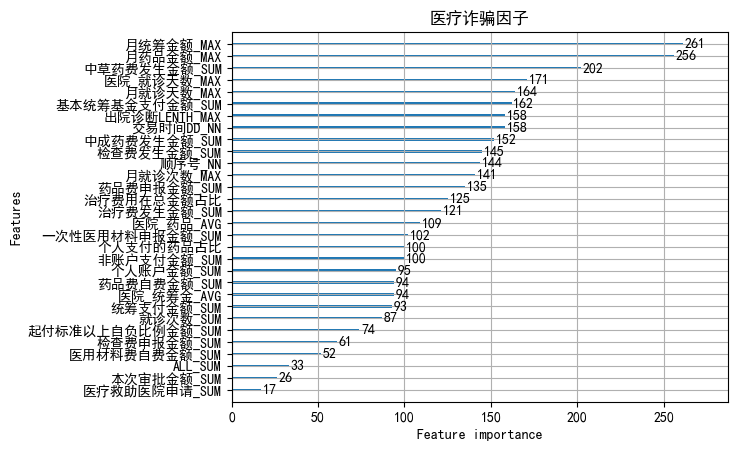

In [32]:
plt.figure(figsize=(18,29),facecolor='red',frameon=False)
lgb.plot_importance(LGB_best_estimator, max_num_features=30)
plt.title("医疗诈骗因子")
plt.show()

<Figure size 1800x2900 with 0 Axes>

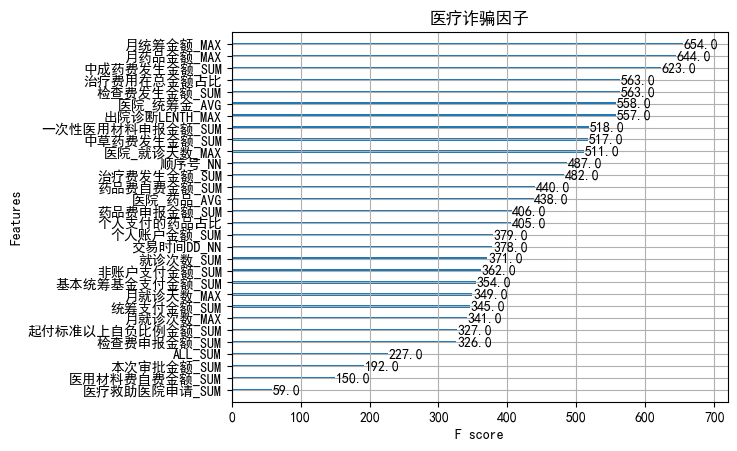

In [33]:
plt.figure(figsize=(18,29),facecolor='red',frameon=False)
plot_importance(XGB_best_estimator, max_num_features=30)
plt.title("医疗诈骗因子")
plt.show()

In [25]:
# 预测新的数据集：X_new_test, y_new_test
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

result_df = pd.DataFrame(columns=['Accuracy', 'F1-score', 'Recall', 'Precision', 'AUC_ROC'],
                         index=['LR','KNN','DT','Bagging','SGD','XGB','LGB',])

def caculate(models, X_test, y_test):
    # 计算各种参数的值
    accuracy_results = []
    F1_score_results = []
    Recall_results = []
    Precision_results = []
    AUC_ROC_results = []
    
    for model in models:
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred) # 计算准确度
        precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred) # 计算：精确度，召回率，f1_score
        AUC_ROC = roc_auc_score(y_test, y_pred) # 计算ROC, AUC
        
        # 保存计算值
        accuracy_results.append(accuracy)
        F1_score_results.append(f1_score)
        Recall_results.append(recall)
        AUC_ROC_results.append(AUC_ROC)
        Precision_results.append(precision)
        
    return accuracy_results, F1_score_results, Recall_results, AUC_ROC_results, Precision_results

In [26]:
# 将所有最优超参数的模型放在一起
best_models = [LR_best_estimator, DT_best_estimator,KNN_best_estimator,
               BAG_best_estimator, SGD_best_estimator,XGB_best_estimator,LGB_best_estimator]

# 调用函数计算各项指标值
accuracy_results, F1_score_results, Recall_results, AUC_ROC_results, Precision_results = caculate(best_models, X_new_1_test, y_new_1_test)

# 将各项值放入到DataFrame中
result_df['Accuracy'] = accuracy_results
result_df['F1-score'] = F1_score_results
result_df['Recall'] = Recall_results
result_df['Precision'] = Precision_results
result_df['AUC_ROC'] = AUC_ROC_results

In [27]:
result_df

,Accuracy,F1-score,Recall,Precision,AUC_ROC
LR,0.798794,"[0.8444256040695208, 0.7152831652443755]","[0.819078947368421, 0.7582236842105263]","[0.8713910761154856, 0.6769456681350955]",0.788651
KNN,0.788377,"[0.8514241724403386, 0.6323809523809524]","[0.9095394736842105, 0.5460526315789473]","[0.8002894356005789, 0.751131221719457]",0.727796
DT,0.861842,"[0.8970588235294118, 0.7899999999999999]","[0.9029605263157895, 0.7796052631578947]","[0.8912337662337663, 0.8006756756756757]",0.841283
Bagging,0.867873,"[0.9034841810172206, 0.7906168549087749]","[0.9276315789473685, 0.7483552631578947]","[0.8805620608899297, 0.8379373848987108]",0.837993
SGD,0.666667,"[0.8, 0.0]","[1.0, 0.0]","[0.6666666666666666, 0.0]",0.500000
XGB,0.882675,"[0.9135702746365104, 0.8174061433447098]","[0.9300986842105263, 0.787828947368421]","[0.8976190476190476, 0.849290780141844]",0.858964
LGB,0.878289,"[0.910411622276029, 0.81025641025641]","[0.9276315789473685, 0.7796052631578947]","[0.8938193343898574, 0.8434163701067615]",0.853618


In [27]:
# 将上述4个模型集成起来，当做一个模型


voting_clf = VotingClassifier(estimators=[('BAG', BAG_best_estimator), ('XGB', XGB_best_estimator),
                                          ('LGB', LGB_best_estimator)], n_jobs=12)

In [38]:
# 训练
voting_clf.fit(X_new_1_train, y_new_1_train)

VotingClassifier(estimators=[('BAG', BaggingClassifier(n_estimators=50)),
                             ('XGB',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.6, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=0.1,
                                            grow_policy=None,
                                            importance_type=None...
                                            max_delta_step=None, max_depth=6,
                                            max_leaves=None, min_child_weight=1,
                                            missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=500, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('LGB',
                              LGBMClassifier(feature_fraction=0.8,
                                             learning_rate=0.05, max_bin=140,
                                             max_depth=6, min_data_in_leaf=50,
                                             n_estimators=400, num_leaves=30,
                                             objective='binary', verbose=-1))],
                 n_jobs=12)

In [39]:
import joblib

joblib_file = "voting_clf.pkl"  
joblib.dump(voting_clf, joblib_file)

joblib_model = joblib.load(joblib_file)
score = joblib_model.score(X_new_1_train, y_new_1_train)  
print("Test score: {0:.2f} %".format(100 * score))  
y_final_pred = voting_clf.predict(X_new_1_test)

Test score: 100.00 %


In [40]:
# 预测
y_final_pred = voting_clf.predict(X_new_1_test)

In [41]:
print(classification_report(y_new_1_test,y_final_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91      1216
           1       0.83      0.78      0.81       608

    accuracy                           0.87      1824
   macro avg       0.86      0.85      0.86      1824
weighted avg       0.87      0.87      0.87      1824



In [42]:
y_final_pred=pd.DataFrame(y_final_pred)
X_new_1_test=pd.DataFrame(X_new_1_test)

In [43]:
nmsl = pd.concat([X_new_1_test, y_final_pred],axis=1).reset_index(drop=True)

In [44]:
nmsl.columns = df.columns

In [45]:
xlsb=nmsl[nmsl['RES'].isin([1])]

In [46]:
xlsb

,个人编码,就诊次数_SUM,月就诊天数_MAX,月就诊次数_MAX,月统筹金额_MAX,月药品金额_MAX,医院_就诊天数_MAX,医院_统筹金_AVG,医院_药品_AVG,顺序号_NN,...,一次性医用材料申报金额_SUM,起付标准以上自负比例金额_SUM,基本统筹基金支付金额_SUM,非账户支付金额_SUM,本次审批金额_SUM,医疗救助医院申请_SUM,出院诊断LENTH_MAX,个人支付的药品占比,治疗费用在总金额占比,RES
0,3.520000e+14,2.839962,3.142198,2.996805,2.187912,3.150323,2.977344,0.608159,1.202338,3.194069,...,-0.556208,2.180505,2.984044,2.720771,2.391138,-0.088610,9.797678e-01,-0.360756,-0.393837,1
1,3.520000e+14,1.844965,1.472790,1.470495,2.683328,0.979222,2.260779,2.361497,0.781755,2.282094,...,1.260124,3.465435,3.119384,0.933679,3.011650,0.615534,-3.714900e-01,-0.331489,1.769411,1
2,3.520000e+14,-0.287201,-0.243731,-0.310976,0.063645,0.220157,-0.706713,-0.544289,-0.526222,-0.203354,...,-0.466559,-0.283435,-0.205591,0.068351,-0.226819,-0.088610,1.742616e-01,-0.389854,0.017484,1
12,3.520000e+14,-0.245962,0.280356,0.111702,8.016871,-0.366725,-0.661780,-0.061676,-0.935802,-0.284098,...,-0.506466,2.763378,2.077648,2.746671,1.867809,-0.088610,-1.967463e+00,0.750929,4.385065,1
18,3.520000e+14,1.022226,4.334633,3.381485,2.554909,3.695761,1.840118,0.489224,1.178210,0.546969,...,-0.556208,0.266754,1.199116,1.852213,0.933332,-0.088610,-2.910000e-16,4.564368,-0.509760,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1817,3.520000e+14,-0.541873,2.665225,2.612124,0.696010,1.242268,-0.775503,-0.819449,-0.813529,-0.607290,...,-0.556208,-0.501408,-0.967153,-0.382794,-0.788211,-0.088610,7.922496e-02,-0.326212,-0.400564,1
1818,3.520000e+14,0.726315,1.949764,1.650423,0.400914,0.881392,-0.036306,-0.610807,-0.515121,0.470018,...,-0.551781,0.217624,0.051205,0.464339,0.035997,-0.088610,-3.301127e-01,-0.379229,-0.365285,1
1821,3.520000e+14,1.698592,1.472790,2.035104,0.641401,1.084612,1.498950,-0.495735,-0.349094,1.024062,...,-0.554732,0.542727,0.475854,0.818218,0.384033,-0.088610,-3.301127e-01,0.203679,-0.348426,1
1822,3.520000e+14,-0.705879,-0.673591,-0.657659,-0.549434,-0.430541,-0.946087,-0.788102,-0.810491,-0.697779,...,-0.556208,-0.657718,-0.880393,-0.556417,-0.755402,-0.088610,-7.394504e-01,-0.356406,-0.372931,1


In [47]:
xlsb.to_csv('test.csv',index=False)

In [41]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(models, names, X, y, ylim=None, cv=None, n_jobs=-1):
    f, ax = plt.subplots(8, 1, figsize=(20, 50))
    if ylim is not None:
        plt.ylim(*ylim)
    for i in range(len(models)):
        train_sizes, train_scores, test_scores = learning_curve(models[i], X, y, cv=cv, n_jobs=n_jobs)

        train_scores_mean = np.mean(train_scores, axis=1)

        test_scores_mean = np.mean(test_scores, axis=1)

        ax[i].plot(train_sizes, train_scores_mean, 'o-', color="#ff9124", label='Training score')
        ax[i].plot(train_sizes, test_scores_mean, '+-', color='#2492ff', label='cross-validation score')

        ax[i].set_title(names[i], fontsize=14)
        ax[i].set_xlabel('Training size(m)')
        ax[i].set_ylabel('Score')
        ax[i].grid(True)
        ax[i].legend(loc='best')

In [42]:
cv = ShuffleSplit(n_splits=5, random_state=42, test_size=0.4) # 切分的比例

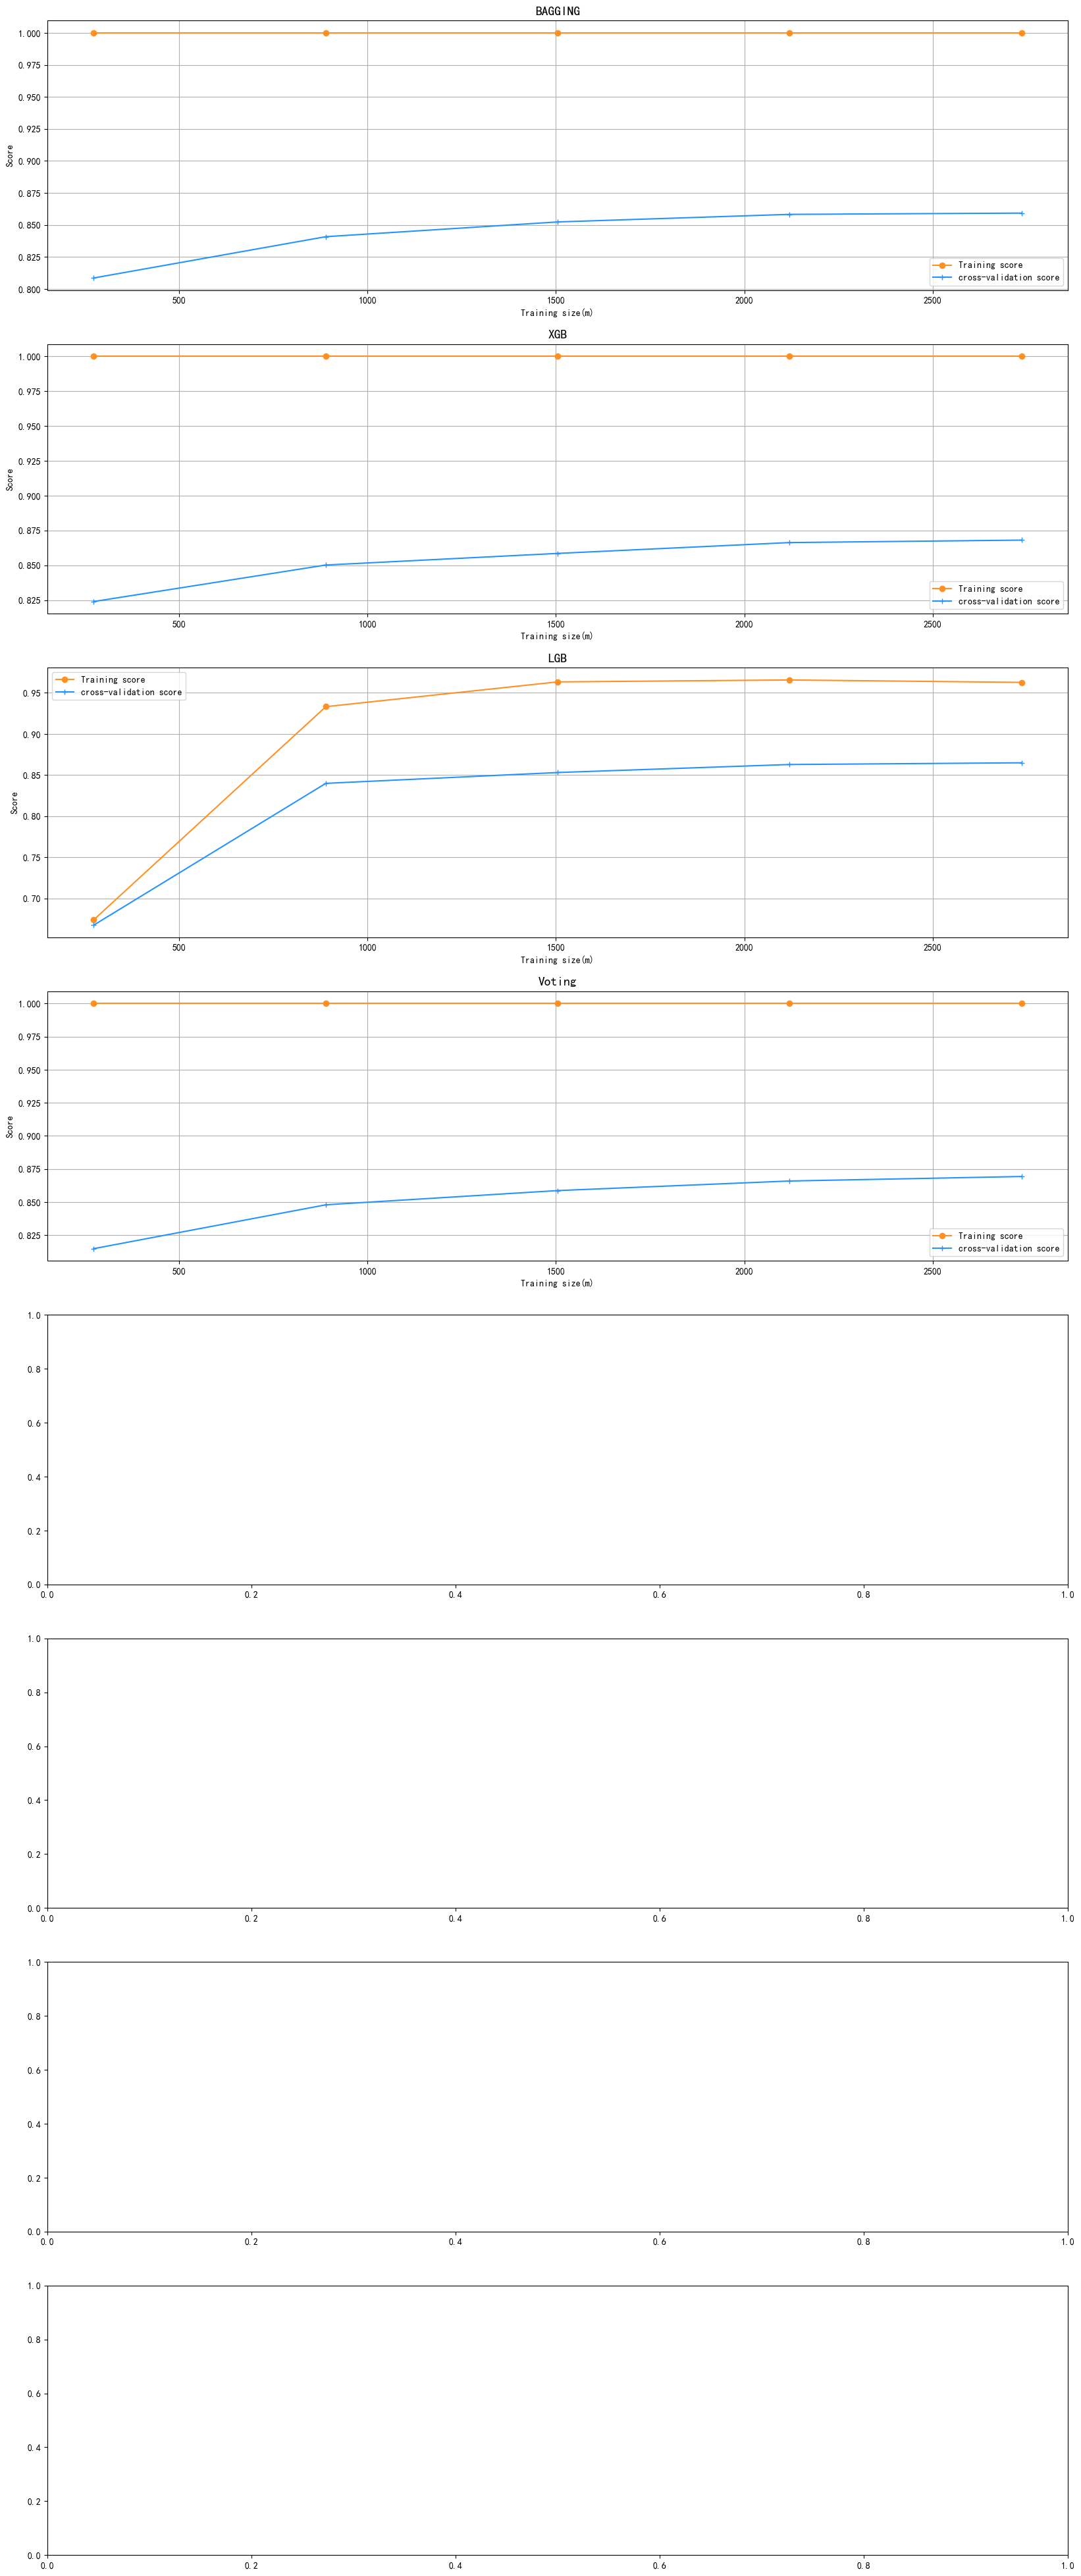

In [45]:
best_models = [BAG_best_estimator,XGB_best_estimator,LGB_best_estimator,voting_clf]

names = ['BAGGING', 'XGB','LGB','Voting']

plot_learning_curve(best_models, names, X, y, cv=cv,n_jobs=12)

In [154]:
from sklearn.model_selection import cross_val_predict

DT_pred = cross_val_predict(DT_best_estimator, X, y, cv=5)
BAG_pred = cross_val_predict(BAG_best_estimator, X, y, cv=5)
XGB_pred = cross_val_predict(XGB_best_estimator, X, y, cv=5)
LGB_pred = cross_val_predict(LGB_best_estimator, X, y, cv=5)

In [155]:
# 计算每个模型的 fpr, tpr
from sklearn.metrics import roc_curve

DT_fpr, DT_tpr, DT_threshold = roc_curve(y, DT_pred)

BAG_fpr, BAG_tpr, BAG_threshold = roc_curve(y, BAG_pred)

XGB_fpr, XGB_tpr, XGB_threshold = roc_curve(y, XGB_pred)

LGB_fpr, LGB_tpr, LGB_threshold = roc_curve(y, LGB_pred)

In [156]:
# 绘制roc曲线
def graph_roc(fpr, tpr, name, score):
    plt.figure(figsize=(16,8)) # 画布大小
    plt.title("ROC Curve", fontsize=14)
    plt.plot(fpr, tpr, label=name+":"+ str(score))
    plt.axis([-0.01, 1, 0, 1]) # 坐标轴
    plt.xlabel("False Positive Rate (FPR)", fontsize=14)
    plt.ylabel("True Positive Rate (TPR)", fontsize=14)
    plt.legend()
    plt.show()

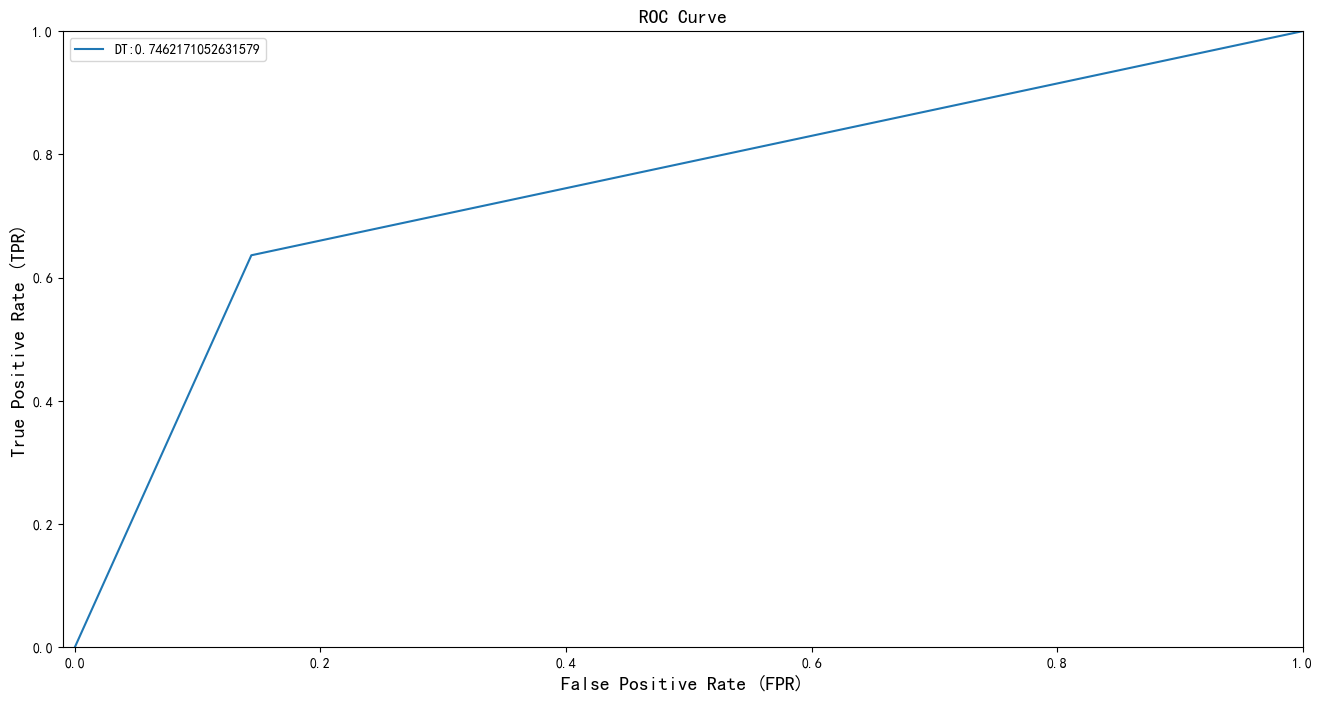

In [177]:
graph_roc(DT_fpr, DT_tpr, 'DT', roc_auc_score(y, DT_pred))

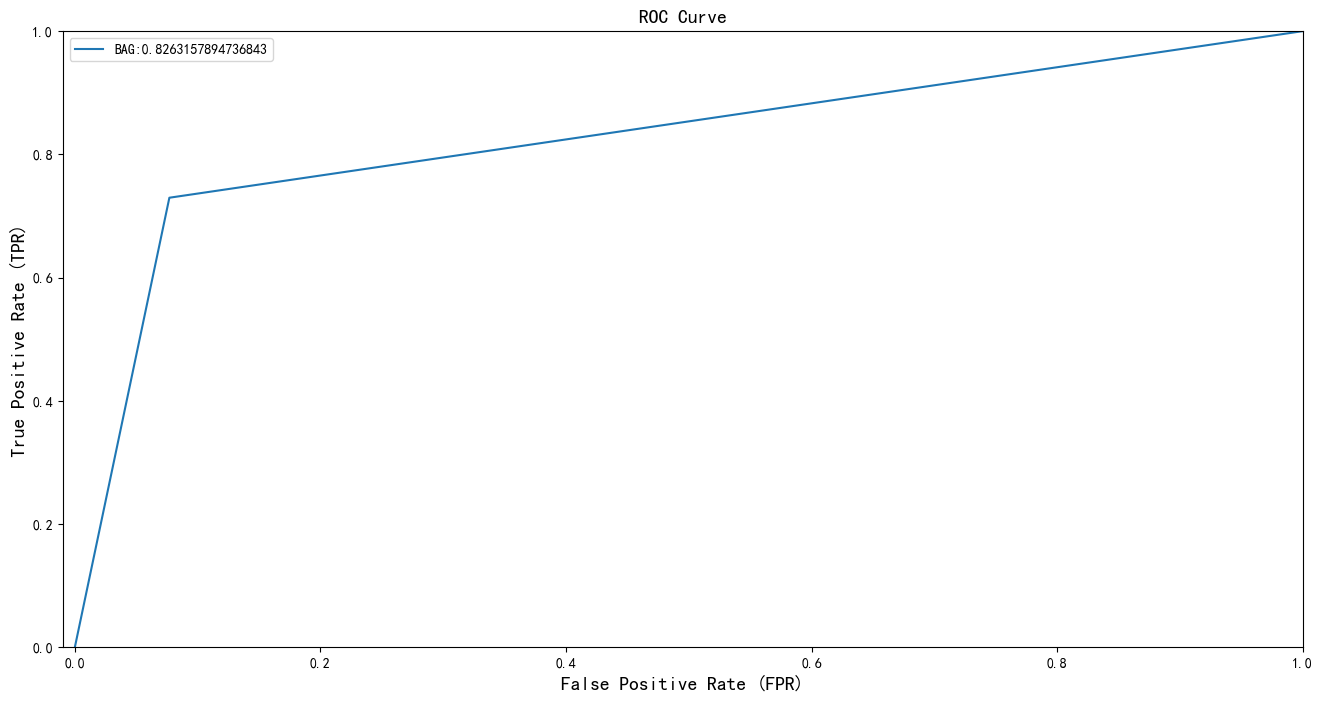

In [178]:
graph_roc(BAG_fpr,BAG_tpr, 'BAG', roc_auc_score(y, BAG_pred))

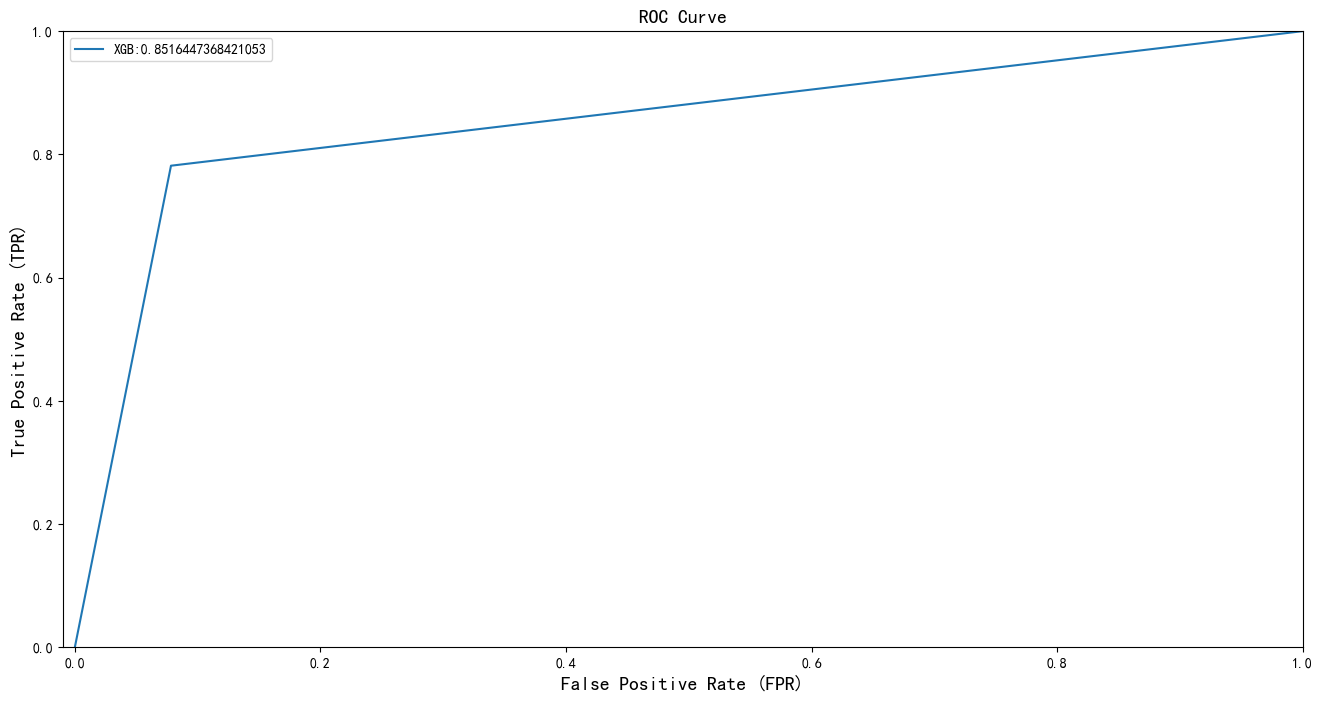

In [179]:
graph_roc(XGB_fpr, XGB_tpr, 'XGB', roc_auc_score(y, XGB_pred))

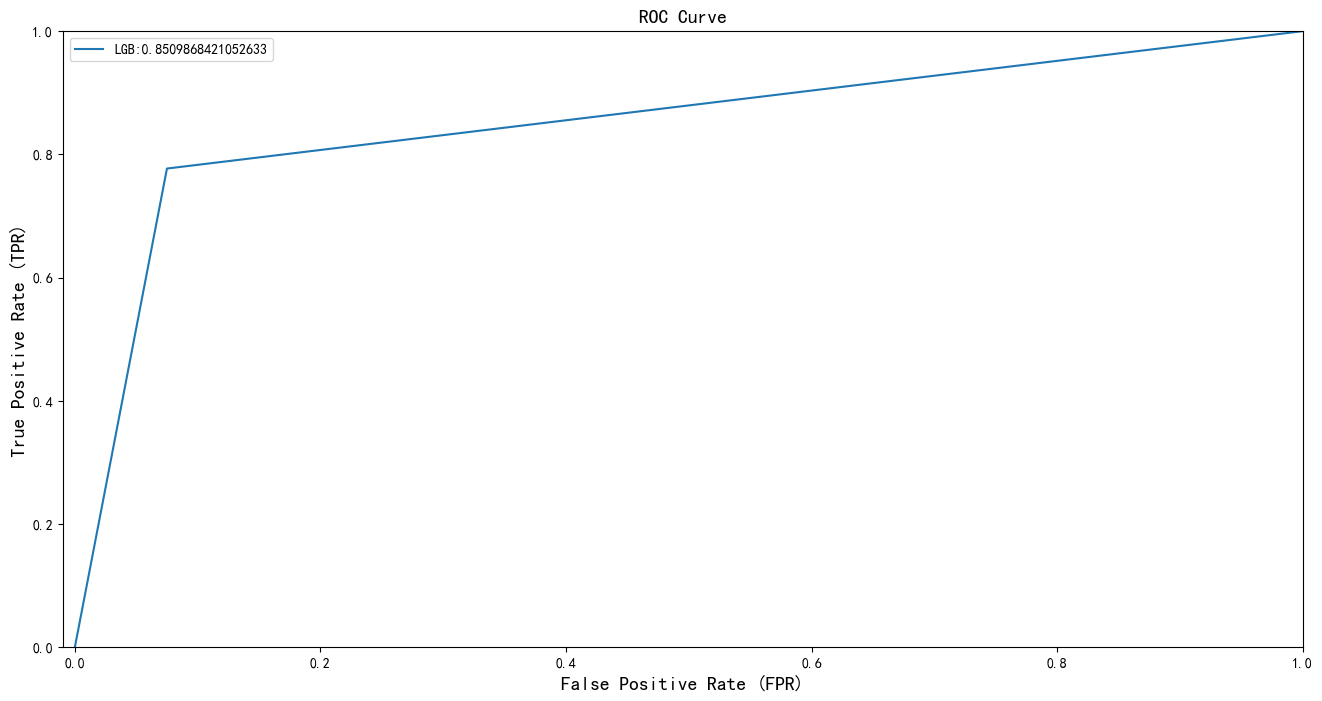

In [180]:
graph_roc(LGB_fpr, LGB_tpr, 'LGB', roc_auc_score(y, LGB_pred))